In [14]:
#check readme file for the dataset website link

import the required models

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow.keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import cv2

In [16]:
train_dir = "/Users/koushikbabu/Documents/final_dogvscat/final_catvsdog/catvsdog/datasets/train"     #copy the path name from dataset
test_dir = "/Users/koushikbabu/Documents/final_dogvscat/final_catvsdog/catvsdog/datasets/test"       

In [17]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=20,class_mode="binary")
test_generator = test_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=20,class_mode="binary")

Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


CNN

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [21]:
from tensorflow.keras import optimizers
model.compile(loss="binary_crossentropy",optimizer=optimizers.legacy.RMSprop(learning_rate=1e-3), metrics = ["accuracy"])

In [22]:
history = model.fit_generator(train_generator,steps_per_epoch=train_generator.samples//20,epochs=5,validation_data=test_generator,validation_steps=test_generator.samples//20)

Epoch 1/5


/var/folders/_p/bn3xfw2x40l2rlw2pgzs1gsm0000gn/T/ipykernel_14165/3373112495.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,steps_per_epoch=train_generator.samples//20,epochs=5,validation_data=test_generator,validation_steps=test_generator.samples//20)


1000/1000 [==============================] - 301s 301ms/step - loss: 0.5861 - accuracy: 0.6912 - val_loss: 0.4933 - val_accuracy: 0.7484
Epoch 2/5
1000/1000 [==============================] - 360s 360ms/step - loss: 0.4582 - accuracy: 0.7885 - val_loss: 0.3735 - val_accuracy: 0.8293
Epoch 3/5
1000/1000 [==============================] - 374s 374ms/step - loss: 0.3948 - accuracy: 0.8277 - val_loss: 0.3113 - val_accuracy: 0.8696
Epoch 4/5
1000/1000 [==============================] - 358s 358ms/step - loss: 0.3462 - accuracy: 0.8543 - val_loss: 0.2424 - val_accuracy: 0.8992
Epoch 5/5
1000/1000 [==============================] - 368s 368ms/step - loss: 0.3073 - accuracy: 0.8739 - val_loss: 0.2178 - val_accuracy: 0.9133


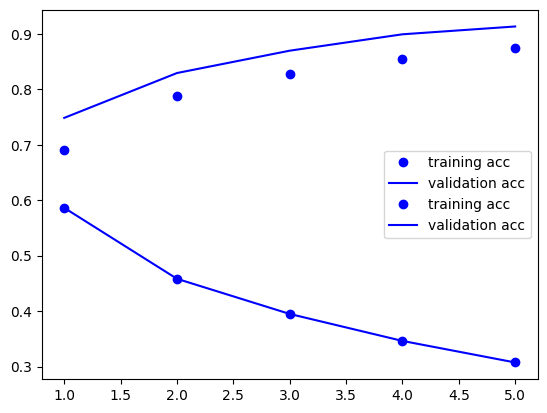

In [32]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["loss"]
epochs  = range(1,len(acc)+1)
plt.plot(epochs,acc,"bo",label = "training acc")
plt.plot(epochs,val_acc,"b",label = "validation acc")
plt.legend()
plt.plot(epochs,loss,"bo",label = "training acc")
plt.plot(epochs,val_loss,"b",label = "validation acc")
plt.legend()
plt.show()

In [33]:
model.save("catvsdog.h5")

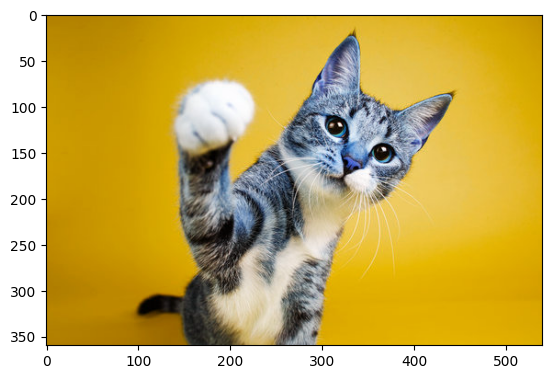

In [52]:
test_img = cv2.imread('/Users/koushikbabu/Documents/final_dogvscat/final_catvsdog/catvsdog/catsamp.jpg')      #give the path of the image that is to be detected
plt.imshow(test_img)

In [53]:
test_img = cv2.resize(test_img,(224,224))
test_input = test_img.reshape((1,224,224,3))

In [54]:
a = model.predict(test_input)
if a == [[0]]:
  print("cat")
else:
  print("dog")

1/1 [==============================] - 0s 17ms/step
cat


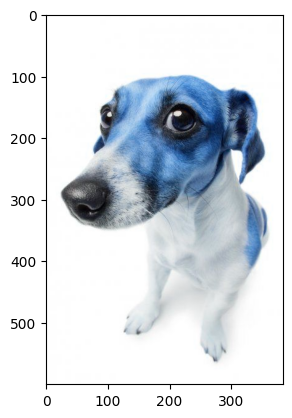

In [55]:
test_img2 = cv2.imread('/Users/koushikbabu/Documents/final_dogvscat/final_catvsdog/catvsdog/dogsamp.jpg')
plt.imshow(test_img2)

In [56]:
test_img2 = cv2.resize(test_img2,(224,224))
test_input2 = test_img2.reshape((1,224,224,3))

In [57]:
a = model.predict(test_input2)
if a == [[0]]:
  print("cat")
else:
  print("dog")

1/1 [==============================] - 0s 18ms/step
dog
